# Getting started with TensorFlow tutorial: A guide to the fundamentals

**What is TensorFlow?**
* TensorFlow is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

**Why use TensorFlow?**
* Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.

**What we're going to cover?**
* TensorFlow is vast. But the main premise is simple: turn data into numbers (tensors) and build machine learning algorithms to find patterns in them.


In this notebook we cover some of the most fundamental TensorFlow operations, more specificially:

1. Introduction to tensors (creating tensors)
2. Getting information from tensors (tensor attributes)
3. Manipulating tensors (tensor operations)
4. Tensors and NumPy
5. Using @tf.function (a way to speed up your regular Python functions)
6. Using GPUs with TensorFlow
7. Exercises to try


## Introduction Tensors

All of the above variables we've created are actually tensors. But you may also hear them referred to as their different names (the ones we gave them):

* `scalar`: a single number.
* `vector`: a number with direction (e.g. wind speed with direction).
* `matrix`: a 2-dimensional array of numbers.
* `tensor`: an n-dimensional array of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).


To add to the confusion, the terms matrix and tensor are often used interchangably.

Going forward since we're using TensorFlow, everything we refer to and use will be tensors.

For more on the mathematical difference between scalars, vectors and matrices see the visual algebra post by Math is Fun.

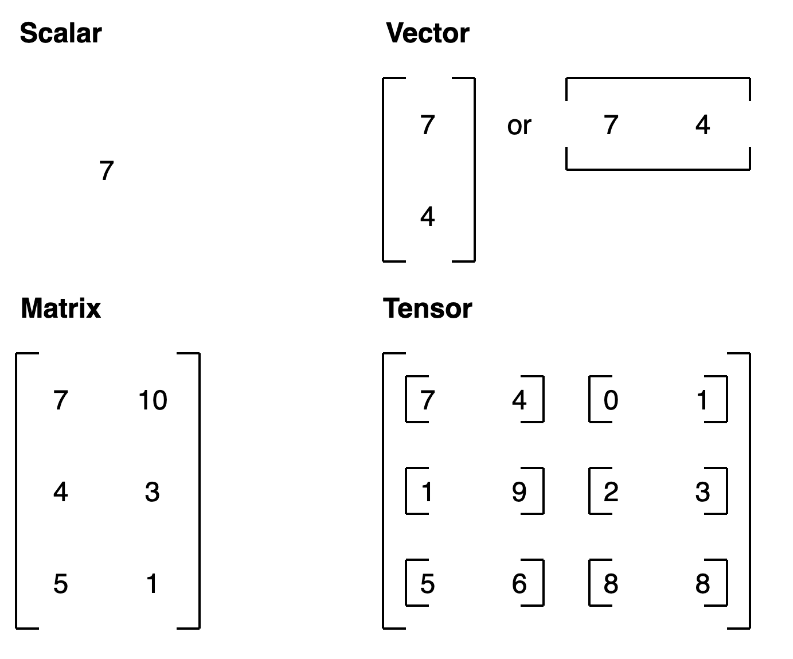

### Creating Tensors with tf.Variable()

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using tf.Variable().

The difference between tf.Variable() and tf.constant() is tensors created with tf.constant() are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with tf.Variable() are mutable (can be changed).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# creating the same tensor with tf.Variable() and tf.Constant()
import tensorflow as tf
changable_tensor = tf.Variable([10,7])
unchangable_tensor= tf.constant([10,7])
changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [2]:
# Now let's try to change an elemnt from changable_tensors
changable_tensor[0].assign(7)
changable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [6]:
#  let's check if this asssigne work with uncangable tensor , it's necessory give me an error
unchangable_tensor[0].assign(7)
unchangable_tensor


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

### Creating random Tensors

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors?

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

We can create random tensors by using the `tf.random.Generator` class.

In [3]:
# Create a new generator with a different seed
new_generator = tf.random.Generator.from_seed(42)
# Generate random values using the new generator
new_random_uniform_tensor = new_generator.uniform(shape=(3, 3), minval=10, maxval=15)
print(new_random_uniform_tensor)

tf.Tensor(
[[13.746723  13.678099  12.261539 ]
 [12.451991  10.944658  12.601376 ]
 [14.368441  12.3460865 13.19663  ]], shape=(3, 3), dtype=float32)


In [4]:
random_normal_tensor = new_generator.normal(shape=(3, 3), mean=5, stddev=1.0)
print(random_normal_tensor)

tf.Tensor(
[[5.3521557 6.0294333 6.127859 ]
 [4.174832  3.9329069 4.3009405]
 [4.3304276 3.912819  5.456197 ]], shape=(3, 3), dtype=float32)


In [5]:
# create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### shufflle the order of elements in a tensor

What if you wanted to shuffle the order of a tensor?

Wait, why would you want to do that?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

In [10]:
import tensorflow as tf

# Create a 2D tensor
tensor = tf.constant([[1, 2], [3, 4], [5, 6]])

# Shuffle the tensor along the first dimension (rows)
shuffled_tensor = tf.random.shuffle(tensor)

print("Original Tensor:")
print(tensor)

print("Shuffled Tensor:")
print(shuffled_tensor)


Original Tensor:
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)
Shuffled Tensor:
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [22]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [34]:
# to give some oreder I have to add inside suffled fnctionattribute seed= ? , and give him value
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

## Matrix Multiplication
One of the most common operations in machine learning algorithms is matrix multiplication.

TensorFlow implements this matrix multiplication functionality in the `tf.matmul()` method.

The main two rules for matrix multiplication to remember are:

1. The inner dimensions must match:

* `(3, 5) @ (3, 5)` won't work
* `(5, 3) @ (3, 5)` will work
* `(3, 5) @ (5, 3)` will work
The resulting matrix has the shape of the outer dimensions:



* (5, 3) `@` (3, 5) -> (5, 5)
* (3, 5) `@` (5, 3) -> (3, 3)

🔑 Note: `@`in Python is the symbol for matrix multiplication.

In [35]:
tensor = tf.constant([[10, 7], [3, 4]])
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [36]:
# matrix Multiplication in Tensors
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [37]:
# Matrix multiplication using @ Symbole
mul = tensor @ tensor
mul

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Both of these examples work because our tensor variable is of shape (2, 2).

What if we created some tensors which had mismatched shapes?

In [38]:
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [39]:
# Try to matrix multiply them
X @ Y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

Trying to matrix multiply two tensors with the shape (3, 2) errors because the inner dimensions don't match


We need to either:

* Reshape X to `(2, 3)` so it's `(2, 3)` @ `(3, 2)`.
* Reshape Y to `(3, 2)` so it's `(3, 2)` @ `(2, 3)`.

We can do this with either:

* `tf.reshape()` - allows us to reshape a tensor into a defined shape.
* `tf.transpose()` - switches the dimensions of a given tensor*

In [40]:
# Example of reshape (3,2) to (2,3)
X @ tf.reshape(Y , shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [41]:
# or we can use transpose (3,2) ---> (2,3)
# tf.transpose(X) @ Y
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

### The dot product
Multiplying matrices by eachother is also referred to as the dot product.

You can perform the `tf.matmul()` operation using `tf.tensordot()`.

In [47]:
tf.tensordot(X, tf.transpose(Y),axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [48]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [49]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Hmm... they result in different values.

Which is strange because when dealing with Y (a (3x2) matrix), reshaping to (2, 3) and tranposing it result in the same shape.

In [50]:
# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(Y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


As you can see, the outputs of tf.reshape() and tf.transpose() when called on Y, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:

* `tf.reshape()` - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
* `tf.transpose()` - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the perm parameter.

So which should you use?

Again, most of the time these operations (when they need to be run, such as during the training a neural network, will be implemented for you).

But generally, whenever performing a matrix multiplication and the shapes of two matrices don't line up, you will transpose (not reshape) one of them in order to line them up.

## Changing the datatype of a tensor
Sometimes you'll want to alter the default datatype of your tensor.

This is common when you want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers).

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

You can change the datatype of a tensor using `tf.cast()`.

In [51]:
# Create a new tensor with default datatype (float32)
B =tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [52]:
C = tf.constant([1,7])
C.dtype

tf.int32

In [53]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [54]:
C = tf.cast(C, dtype=tf.float16)
C

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1., 7.], dtype=float16)>

In [55]:
C.dtype , B.dtype

(tf.float16, tf.float16)

## Finding the min, max, mean, sum (aggregation)
You can quickly aggregate (perform a calculation on a whole tensor) tensors to find things like the minimum value, maximum value, mean and sum of all the elements.

To do so, aggregation methods typically have the syntax reduce()_[action], such as:

* `tf.reduce_min()` - find the minimum value in a tensor.
* `tf.reduce_max()` - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
* `tf.reduce_mean()` - find the mean of all elements in a tensor.
* `tf.reduce_sum()` - find the sum of all elements in a tensor.
**Note**: typically, each of these is under the math module, e.g. `tf.math.reduce_min()` but you can use the alias `tf.reduce_min()`.

In [56]:
# Create a tensor with 50 random values between 0 and 100
import numpy as np
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([64, 27,  1, 35, 36, 23, 88, 57, 69, 11, 90, 85,  1, 23, 29,  6, 39,
       91, 29, 54, 61, 92, 34,  6, 33, 28, 69, 33, 81, 22, 81, 81, 25, 93,
        4, 83, 37, 88, 70, 74,  5, 63, 54,  2, 25, 10,  4, 94, 96, 54])>

In [57]:
tf.reduce_min(E) , tf.reduce_max(E) , tf.reduce_mean(E) , tf.reduce_sum(E)

(<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=96>,
 <tf.Tensor: shape=(), dtype=int64, numpy=47>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2360>)

## Finding the positional maximum and minimum
How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say ['Green', 'Blue', 'Red']) with your prediction probabilities tensor (e.g. [0.98, 0.01, 0.01]).

In this case, the predicted label (the one with the highest prediction probability) would be 'Green'.

You can do the same for the minimum (if required) with the following:

* `tf.argmax()` - find the position of the maximum element in a given tensor.
* `tf.argmin()` - find the position of the minimum element in a given tensor.

In [58]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.7558414 , 0.58849947, 0.35207904, 0.73463957, 0.32992579,
       0.59415536, 0.45984648, 0.05020689, 0.78867164, 0.66840677,
       0.73493772, 0.79537992, 0.69923858, 0.78116264, 0.27280982,
       0.35767749, 0.96890406, 0.74467709, 0.3104743 , 0.04606585,
       0.15853768, 0.32024859, 0.03045604, 0.80957684, 0.3112979 ,
       0.22937842, 0.90551615, 0.51651215, 0.76627904, 0.31479282,
       0.79317491, 0.12949331, 0.74836198, 0.92498582, 0.01811192,
       0.97435487, 0.4408496 , 0.53872342, 0.632443  , 0.37904894,
       0.30497863, 0.96055597, 0.57894567, 0.05019618, 0.29919934,
       0.33578274, 0.35105224, 0.29632704, 0.60182742, 0.49207369])>

In [59]:
tf.argmax(F) , tf.argmin(F)

(<tf.Tensor: shape=(), dtype=int64, numpy=35>,
 <tf.Tensor: shape=(), dtype=int64, numpy=34>)

In [60]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}")
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}")
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of F is at position: 35
The maximum value of F is: 0.9743548739021626
Using tf.argmax() to index F, the maximum value of F is: 0.9743548739021626
Are the two max values the same (they should be)? True


In [61]:
# to find the variance of our tensor , we can need access to tensorflow_probability
import tensorflow_probability as tfp
tfp.stats.variance(F)

<tf.Tensor: shape=(), dtype=float64, numpy=0.07522372999638001>

You can also find the standard deviation `(tf.math.reduce_std())` and variance `(tf.math.reduce_variance())` of elements in a tensor using similar methods.


In [62]:
# find the standard deviation
tf.math.reduce_std(F)
tf.math.reduce_variance(F)

<tf.Tensor: shape=(), dtype=float64, numpy=0.07522372999638001>

## Squeezing a tensor (removing all single dimensions)

If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use tf.squeeze().

`tf.squeeze()` - remove all dimensions of 1 from a tensor.

In [63]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
L = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
L.shape, L.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [64]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(L)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

## One-hot encoding
If you have a tensor of indicies and would like to one-hot encode it, you can use tf.one_hot().

You should also specify the depth parameter (the level which you want to one-hot encode to).

* `One-hot encoding` is a technique used to represent categorical data as binary vectors. It’s commonly used in machine learning and deep learning to transform categorical features or class labels into a format that models can understand.

In [65]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# One hot encode them
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

You can also specify values for `on_value` and `off_value` instead of the default `0` and `1`.

In [66]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

## Squaring, log, square root
Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:

* `tf.square()` - get the square of every value in a tensor.
* `tf.sqrt()` - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error).
* `tf.math.log()` - get the natural log of every value in a tensor (elements need to floats).

In [67]:
# Create a new tensor
H = tf.constant(np.arange(1, 10))
H

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [68]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [69]:
# Find the squareroot (will error), needs to be non-integer
tf.sqrt(tf.cast(H , dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [70]:
# Find the log (input also needs to be float)
tf.math.log(tf.cast(H,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

## Manipulating tf.Variable tensors
Tensors created with tf.Variable() can be changed in place using methods such as:

* `.assign()` - assign a different value to a particular index of a variable tensor.
* `.add_assign()` - add to an existing value and reassign it at a particular index of a variable tensor.

In [71]:
# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [72]:
# Assign the final value a new value of 50
I.assign([0, 1, 2, 3, 50])
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [73]:
# Add 10 to every element in I
I.assign_add([10, 10, 10, 10, 10])
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

### Tensors and NumPy
We've seen some examples of tensors interact with NumPy arrays, such as, using NumPy arrays to create tensors.

Tensors can also be converted to NumPy arrays using:

* `np.array()` - pass a tensor to convert to an ndarray (NumPy's main datatype).
* `tensor.numpy()` - call on a tensor to convert to an ndarray.
Doing this is helpful as it makes tensors iterable as well as allows us to use any of NumPy's methods on them.

In [74]:
# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [75]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [76]:
# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [77]:
# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

## Using @tf.function
In your TensorFlow adventures, you might come across Python functions which have the decorator @tf.function.

If you aren't sure what Python decorators do, read RealPython's guide on them.

But in short, decorators modify a function in one way or another.

In the @tf.function decorator case, it turns a Python function into a callable TensorFlow graph. Which is a fancy way of saying, if you've written your own Python function, and you decorate it with @tf.function, when you export your code (to potentially run on another device), TensorFlow will attempt to convert it into a fast(er) version of itself (by making it part of a computation graph).

For more on this, read the Better performnace with tf.function guide.

In [78]:
# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [79]:
# Create the same function and decorate it with tf.function
@tf.function
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

## Finding access to GPUs
We've mentioned GPUs plenty of times throughout this notebook.

So how do you check if you've got one available?

You can check if you've got access to a GPU using tf.config.`list_physical_devices()`.

In [80]:
print(tf.config.list_physical_devices('GPU'))

[]


In [81]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


If you've got access to a GPU, the cell above should output something like:

`[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]`

In [83]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
